<a href="https://colab.research.google.com/github/Madaraka02/gendered-word-embeddings/blob/main/GenderedEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Gendered Directions in Embeddings

*version 2022.1, details/bugs might be fixed within the first week of publication, you will be notified if this happens*

Most of those interested in computational linguistics have probably read about model bias. What is often less clear is what bias means in terms of data and modelling. In this assignment, you will reproduce results from a famous paper on the technical side of this problem. The discussion on if bias has real-world implications and the details of the meaning of the word "bias" will be picked up again later.

The following will be based on the paper *Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings*. In this paper, the authors start by finding word analogies and investigate semantic closeness. Your task is to reproduce some of their results. You are given code for the analysis, but the reading and representing of the data is up to you to implement.


## Submission
 
Please submit your code as a notebook through studium. You should include the following:
 
1. A working implementation of your embedding class, with the given code cells untouched or with additional experiments, reproducing your principal results when run. Please ensure that outputs are stored in the notebook (preferably by rerunning your notebook as the last thing you do before submitting).
2. Comment *your* code properly, especially for longer or opaque functionality. Please try to write self documenting code (e.g. by choosing descriptive variable names, refactoring to isolate functionality, and by minimizing code duplication).
4. Comments on what you thought was hard in the assignment, what you think was educational, what took most time, and which parts might be unnecessarily tricky.
5. As the submission is anonymous, **all personal information must be removed**.
6. Apart from sections and titles, please remove all unnecessary text and code from the notebook you hand in. Keep only that which strengthens the case for you having fulfilled the listed requirements.


## Requirements for grade G

To achieve a pass (G) on this assignment, you must finish the `Embedding` class without serious errors.


### Additional requirements for grade VG

For a pass with distinction grade (VG), you should *try to* extend the experiments to an additional language. The experiments should not be as thorough, and can be limited to finding a smaller set of professions and directional pairs. As the course is given in English, you can not (for legal reasons) be required to know any other languages. However, you can use the dictionaries from [MUSE](https://github.com/facebookresearch/MUSE#ground-truth-bilingual-dictionaries) (or other source) to find rough translations.

The language aligned embeddings, as described in Joulin et al. (2018), can be found [on the fasttext website](https://fasttext.cc/docs/en/aligned-vectors.html). This means that the word vectors can be used for translations using nearest neighbours. Also, the vectors can be run through PCA and the closeness of words can be visualized.

In addition to your notebook, please submit 1-3 slides with a short manuscript (< 500 words) presenting your results.


### Plagiarism
 
In code assignments, plagiarism is a tricky concept. A clean cut way would be to demand that you write all the code yourself, from memory, with only the assigned literature as help. This is not how code is developed professionally. It is common to copy and share. However, since this is a learning exercise, you must implement everything on your own, but please look at the course repo, Stack Overflow etc. Moreover, discuss with course mates and TAs to find inspiration and solutions. Code that is *obviously* copied (with minor modifications) will be considered as plagiarized. As a part of the examination, you might be asked to explain any particular part of the functionality in your implementation.


### References

Bolukbasi et al., (2016) "[*Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings*](https://arxiv.org/pdf/1607.06520.pdf)," arXiv

Joulin et al. (2018) "[*Loss in Translation: Learning Bilingual Word Mapping with a Retrieval Criterion*](https://arxiv.org/abs/1804.07745)," arXiv

Let's download the embedding data file. You can find more languages and manuals [here](https://fasttext.cc/docs/en/crawl-vectors.html).

In [1]:
!wget -N https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz

--2022-07-19 23:03:01--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 172.67.9.4, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1325960915 (1.2G) [binary/octet-stream]
Saving to: ‘cc.en.300.vec.gz’

cc.en.300.vec.gz    100%[===================>]   1.23G  7.20MB/s    in 3m 13s  

2022-07-19 23:06:15 (6.54 MB/s) - ‘cc.en.300.vec.gz’ saved [1325960915/1325960915]



The format is fairly simple. It has one token per line, which are space separated lists. For fasttext, the tokens are usually ordered by frequency in the training data.

In [2]:
!gzip -cd cc.en.300.vec.gz | head -n 20

2000000 300
, 0.1250 -0.1079 0.0245 -0.2529 0.1057 -0.0184 0.1177 -0.0701 -0.0401 -0.0080 0.0772 -0.0226 0.0893 -0.0487 -0.0897 -0.0835 0.0200 0.0273 -0.0194 0.0964 0.0875 0.0098 0.0453 0.0155 0.1462 0.0225 0.0448 0.0137 0.0570 0.1764 -0.1072 -0.0826 0.0173 0.1090 0.0207 -0.1271 0.2445 0.0375 -0.0209 -0.0445 0.0540 0.1282 0.0437 0.0588 0.0984 0.0539 0.0004 0.1290 0.0242 -0.0120 -0.0480 0.0346 -0.0664 -0.0330 -0.0625 -0.0708 -0.0579 0.1738 0.4448 0.0370 -0.1001 -0.0032 0.0359 -0.0685 -0.0361 0.0070 0.1316 -0.0945 -0.0610 0.0178 -0.0763 -0.0192 0.0033 0.0056 0.1878 -0.0754 -0.0095 0.0446 -0.0588 0.0244 -0.0251 -0.0493 0.0308 -0.0359 -0.1884 -0.0988 0.1887 0.0459 -0.0816 -0.1524 -0.0375 -0.0692 0.0427 -0.0471 -0.0086 -0.2190 -0.0064 0.0877 -0.0074 -0.1400 -0.0156 0.0161 0.1040 -0.1445 -0.0719 -0.0144 -0.0293 -0.0126 0.0619 -0.0373 -0.1471 -0.2552 -0.0685 0.2892 -0.0275 0.0436 0.0311 0.0249 0.0142 0.0403 0.1729 0.0023 -0.0255 -0.0212 0.0701 -0.0727 0.0279 0.1151 -0.0394 -0.0962 -0.0598 -0.

Standard imports

In [3]:
from urllib.request import urlopen
import numpy as np


Now for the class you are to implement in this assignment. *Tip: You don't need to load all the vectors for the embedding to be usefull.*

In [4]:
from tqdm import tqdm
import os.path
import gzip
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import shutil

class Embedding(object):

  def __init__(self, filename):
    """Embedding loader with methods for comparisons and searching
    
    filename:
      The path of the chosen fasttext embedding data file."""
    assert os.path.exists(filename)
    
    """read the zip file and write it to a txt file then 
    create an embedding dictionary for all the words with
    with the word as the key and the vector as the value"""
    
    with gzip.open(filename, 'rb') as f_in:
        with open('modelfile.txt', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
        
    embeddings_dictionary = dict()

    model = open('modelfile.txt', encoding="utf8")
    words=[]

    for line in model:
        records = line.split()
        word = records[0]
        words.append(word)
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions
    model.close()
    
    self.embeddings_dictionary = embeddings_dictionary
    self.words=words

  def __len__(self):
    
    """Gives the number of tokens in the embedding."""
    number_of_tokens = len(self.embeddings_dictionary)
    return number_of_tokens


  def __getitem__(self, tokens):
    """Returns the vectors for a token or a list of tokens."""
    assert type(tokens) == str or type(tokens) == list
    
    """ check if token is a string then get its emmbedding vector from the dictionary
    if the tokens are a list loop through the list and get the vectors for each
    token in the tokens list"""
    
    
    if type(tokens) == str:
        vectors = self.embeddings_dictionary[tokens]
    if type(tokens) == list:   
      # for token in tokens:
        vectors = np.array([self.embeddings_dictionary[token] for token in tokens])
        
    
    return vectors

  def __contains__(self, token):
    """Allows a user query if a tokens is in the embedding."""
    
    
    """ go through the embedding dictionary and check if the token is a key
    if its found return True else return False"""
    
    return token in self.embeddings_dictionary


  def projection(self, direction, vectors):
    """The cosine similarity between a reference direction and a matrix of word vectors.
    
    direction:
      A vector
    vectors:
      A row matrix with word vectors"""
    
    """ 
        finds the actual distance between points in N-D space
        
    """
    token_projection = None
    if type(vectors) == list:
      vectors=[self.embeddings_dictionary[vector] for vector in vectors]
      token_projection = euclidean_distances(vectors, [direction])

    else:
      # vectors=self.embeddings_dictionary[vectors]
      token_projection = euclidean_distances([vectors], [direction])
    return token_projection


  def simple_analogy(self, pair, query, k=5):
    """Simple/Classic word analogy as: man - woman = king - queen"""
    
    query = self.embeddings_dictionary[query]


    word_to_find_analogy=query-self.embeddings_dictionary[pair[0]]+self.embeddings_dictionary[pair[1]]
    analogies=[]
    for w in self.words:
        sim = cosine_similarity([word_to_find_analogy],[self.embeddings_dictionary[w]])
        if sim > 0.5:
            analogies.append(w.lower())

            
    return analogies[:k]

  def similarity(self, token1, token2):
    """Returns the cosine similarity between two tokens."""
    
    token1 = self.embeddings_dictionary[token1]
    token2 = self.embeddings_dictionary[token2]
    

    token_similarity = cosine_similarity([token1],[token2])
    
    return token_similarity

  def analogies(self,analogy_direction, tokens):
    """The more complex word analogy method"""
    
    analogiess=[]
    for w in tokens:
        if w in self.embeddings_dictionary.keys():
        
            sim = cosine_similarity([analogy_direction],[self.embeddings_dictionary[w]])

            analogiess.append(w)
    return [tuple(analogiess) ]    


In [5]:
embedding = Embedding("cc.en.300.vec.gz")

Some unit tests that should work when using an embedding for english. 

In [6]:
assert 'man' in embedding
assert 'woman' in embedding
assert 'kdjfsfhgkdsjfdh' not in embedding

assert len(embedding) > 10000

assert type(embedding['man']) is np.ndarray
assert np.isclose(np.sum(embedding['man']-embedding['man']), 0)

## Word similarity

We should be able to meassure semantic similarity using cosine similarity.

$cos(\overrightarrow{cat}, \overrightarrow{dog}) \geq cos(\overrightarrow{cat}, \overrightarrow{cow})$

In [7]:
assert embedding.similarity('cat', 'dog') >= embedding.similarity('cat', 'cow')

## Word analogies

One of the core tasks for showing any semantic properties in an embedding is finding word analogies. We can this of this as word a is to word b, as word c is to word d. Our task is to find word d, knowing a, b, and c.

$\overrightarrow{a} - \overrightarrow{b} \approx \overrightarrow{c} - \overrightarrow{d}$

For gender, this becomes:

$\overrightarrow{man} - \overrightarrow{woman} \approx \overrightarrow{king} - \overrightarrow{x}$

By rearranging we get:

$\overrightarrow{king} - \overrightarrow{man} + \overrightarrow{woman} \approx \overrightarrow{x}$

In [8]:
best_matches = embedding.simple_analogy(('man', 'woman'), 'king', k=5)
print("Matches (in order of similarity):")
for i, token in enumerate(best_matches):
  print(i+1, token)

assert 'queen' in embedding.simple_analogy(('man', 'woman'), 'king', k=5)

Matches (in order of similarity):
1 queen
2 king
3 queen
4 royal
5 kings


We can do this for capitols too.

$\overrightarrow{France} - \overrightarrow{Japan} \approx \overrightarrow{Paris} - \overrightarrow{x}$

In [9]:
best_matches = embedding.simple_analogy(('france', 'japan'), 'paris', k=5)
print("Matches (in order of similarity):")
for i, token in enumerate(best_matches):
  print(i+1, token)

assert 'tokyo' in embedding.simple_analogy(('france', 'japan'), 'paris', k=5)

Matches (in order of similarity):
1 tokyo
2 asian
3 japanese
4 york
5 london


Please try doing this for at least one other famous category (e.g. comparing adjectives).

## Finding the genderedness of professions

Bulokbasi (2016) has a repo for the paper. We can download their data for professions. This allows us to find the genderedness for our embedding and plot against their survey data.

In [10]:
import json
with urlopen('https://raw.githubusercontent.com/tolga-b/debiaswe/master/data/professions.json') as remote_file:
  professions = {title: {'definitional': defi, 'stereotypical': ster} for title, defi, ster in json.load(remote_file)}
print("Loaded %i professions" % len(professions))

Loaded 320 professions


We want to find the projection of vectors for different profession on a gender direction. This can be done by finding the cosine similarity as:

$cos(\overrightarrow{man} - \overrightarrow{woman}, \overrightarrow{butcher})$

$cos(\overrightarrow{man} - \overrightarrow{woman}, \overrightarrow{ballerina})$

The projection should be non-negative as $|cos(\cdot,\cdot)|$. However, by letting the projection method of your embedding class give us the cosine similarity, we can see the direction of the projection by looking at its sign.

In [11]:
assert type(embedding[['man', 'woman', 'butcher']]) is np.ndarray
assert embedding[['man', 'woman', 'butcher']].shape[0] == 3

assert embedding.projection(embedding['man']-embedding['woman'], embedding['butcher']) > 0
assert embedding.projection(embedding['man']-embedding['woman'], embedding['ballerina']) < 0

AssertionError: ignored

We create a woman-man direction.

In [12]:
direction = embedding['man']-embedding['woman']
titles = [title for title in professions.keys() if title in embedding]
projection = embedding.projection(direction, titles)

The estimation of the gender direction can be improved by using several pairs. Again, we use the data from Bulokbasi (2016).

In [13]:
import json
with urlopen('https://raw.githubusercontent.com/tolga-b/debiaswe/master/data/definitional_pairs.json') as remote_file:
  definitional_pairs = [(m, f) for m, f in json.load(remote_file)]
definitional_pairs

[('woman', 'man'),
 ('girl', 'boy'),
 ('she', 'he'),
 ('mother', 'father'),
 ('daughter', 'son'),
 ('gal', 'guy'),
 ('female', 'male'),
 ('her', 'his'),
 ('herself', 'himself'),
 ('Mary', 'John')]

In [14]:
direction2 = np.zeros(embedding['man'].shape)
for female, male in definitional_pairs:
  direction2 += embedding[male.lower()]
  direction2 -= embedding[female.lower()]

projection2 = embedding.projection(direction2, titles)

We can plot the relation between genderedness in the data and human annotation.

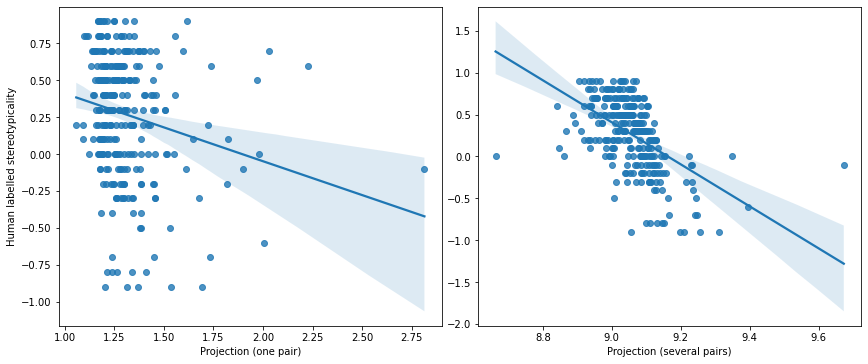

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 5))
ax = fig.subplots(1, 2)
stereotypicality = [professions[title]['stereotypical'] for title in titles]
sns.regplot(x=projection, y=stereotypicality, ax=ax[0])
a = sns.regplot(x=projection2, y=stereotypicality, ax=ax[1])
ax[0].set_xlabel("Projection (one pair)")
ax[1].set_xlabel("Projection (several pairs)")
ax[0].set_ylabel("Human labelled stereotypicality")
fig.tight_layout(pad=.5)
fig.show()

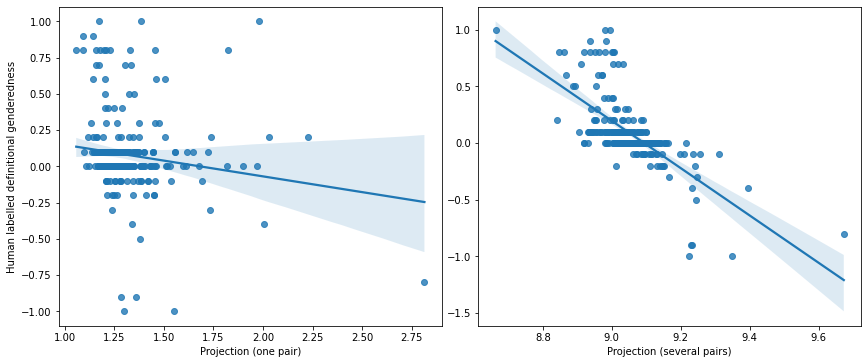

In [16]:
fig = plt.figure(figsize=(12, 5))
ax = fig.subplots(1, 2)
definitionality = [professions[title]['definitional'] for title in titles]
sns.regplot(x=projection, y=definitionality, ax=ax[0])
a = sns.regplot(x=projection2, y=definitionality, ax=ax[1])
ax[0].set_xlabel("Projection (one pair)")
ax[1].set_xlabel("Projection (several pairs)")
ax[0].set_ylabel("Human labelled definitional genderedness")
fig.tight_layout(pad=.5)
fig.show()

# More analogies

The paper defines a more advances procedure for analogies as:

$S_{(a,b)}(x, y) = \left\{\begin{matrix}
cos(\overrightarrow{a}-\overrightarrow{b}, \overrightarrow{x}-\overrightarrow{y}) & \parallel \overrightarrow{x}-\overrightarrow{y} \parallel \leq 1\\ 
0 &  \text{otherwise}
\end{matrix}\right.$

This should return a list of tuples with word pairs.

In [17]:
assert len(embedding.analogies(embedding['man']-embedding['woman'], ['actor', 'actress'])) == 1
assert type(embedding.analogies(embedding['man']-embedding['woman'], ['actor', 'actress'])) == list
assert type(embedding.analogies(embedding['man']-embedding['woman'], ['actor', 'actress'])[0]) == tuple

embedding.analogies(embedding['man']-embedding['woman'], ['actor', 'actress'])

[('actor', 'actress')]

In [18]:
embedding.analogies(analogy_direction=direction2, tokens=titles)

[('accountant',
  'acquaintance',
  'actor',
  'actress',
  'administrator',
  'adventurer',
  'advocate',
  'aide',
  'alderman',
  'ambassador',
  'analyst',
  'anthropologist',
  'archaeologist',
  'archbishop',
  'architect',
  'artist',
  'artiste',
  'assassin',
  'astronaut',
  'astronomer',
  'athlete',
  'attorney',
  'author',
  'baker',
  'ballerina',
  'ballplayer',
  'banker',
  'barber',
  'baron',
  'barrister',
  'bartender',
  'biologist',
  'bishop',
  'bodyguard',
  'bookkeeper',
  'boss',
  'boxer',
  'broadcaster',
  'broker',
  'bureaucrat',
  'businessman',
  'businesswoman',
  'butcher',
  'butler',
  'cabbie',
  'cameraman',
  'campaigner',
  'captain',
  'cardiologist',
  'caretaker',
  'carpenter',
  'cartoonist',
  'cellist',
  'chancellor',
  'chaplain',
  'character',
  'chef',
  'chemist',
  'choreographer',
  'cinematographer',
  'citizen',
  'cleric',
  'clerk',
  'coach',
  'collector',
  'colonel',
  'columnist',
  'comedian',
  'comic',
  'commander'